In [1]:
import spacy
import en_core_web_sm
import numpy as np
from spacy.tokens import Span
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import requests
from bs4 import BeautifulSoup
from PIL import Image
from wordcloud import WordCloud
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import string
from nltk.corpus import stopwords
from pywsd.utils import lemmatize_sentence
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
import networkx as nx
from nltk.corpus import stopwords
import string
lemmatizer = WordNetLemmatizer()
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

Warming up PyWSD (takes ~10 secs)... took 5.263597249984741 secs.
PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
df = pd.read_csv (r'result_f1.csv')
df_2 = pd.read_csv (r'result_new.csv')

df= pd.concat([df,df_2], ignore_index = True)

In [3]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [4]:
sentences = ' '.join(df['text'])
splitted_sentences = split_into_sentences(sentences)

In [5]:
lemmed_sentences = []
connected_lemmed = []
count = 0

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for sentence in df['text']:
    text = re.sub(r'http\S+', '', sentence)
    clean_tweet = re.sub("@[A-Za-z0-9_]+","", text)
    clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet)
    clean_tweet = deEmojify(clean_tweet)
    if count % 100 ==0:
        print(count)
    lem = lemmatize_sentence(clean_tweet)
    lem_c = ' '.join(lem)
    connected_lemmed.append(lem_c)
    lemmed_sentences.append(lem)
    count += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [6]:
sid_obj = SentimentIntensityAnalyzer()
sentiment_result = []
sent = []
for text in connected_lemmed:
    sentiment_dict = sid_obj.polarity_scores(text)
    sent.append(sentiment_dict['compound'])
    if sentiment_dict['compound'] >= 0.05 :
        sentiment_result.append('pos')
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment_result.append('neg')
    else :
        sentiment_result.append('neu')

data = {'original sentence':df['text'], 'location': df['location'], 'followers':df['followers'],'category':sentiment_result, 'sentiment score': sent, 'lemmed tokens':lemmed_sentences, 'lemmed sentence':connected_lemmed}
df_all = pd.DataFrame(data)

In [7]:
mention_whole = []
for lem_c in df_all['lemmed sentence']:
    mention = []
    if 'max' in lem_c or 'verstappen' in lem_c:
        mention.append('Max')
    if 'lewis' in lem_c or 'hamilton' in lem_c:
        mention.append('Lewis')
    mention_whole.append(mention)

In [8]:
df_all['mention'] = mention_whole

In [9]:
df_all

,original sentence,location,followers,category,sentiment score,lemmed tokens,lemmed sentence,mention
0,@Motor_Sport @richardaucock I have been to lot...,"New York, NY",3338,neu,0.0000,"[i, have, be, to, lot, of, race, ,, and, usual...","i have be to lot of race , and usually try to ...",[]
1,@gunter_andreas @ArtSaSch @F1 @fia @LewisHamil...,USA,214,neg,-0.6322,"[source, for, your, 'rule, ', ?, be, this, ano...",source for your 'rule ' ? be this another rule...,[]
2,@Jack_Webb08 The fake #WDChampion? We'll pass....,USA,214,neg,-0.4767,"[the, fake, ?, we, 'll, pass, .]",the fake ? we 'll pass .,[]
3,"""- Oh Checo is a legend!!\n- Absolute animal""\...","48.894506,2.336496",214,neu,0.0000,"[``, -, oh, checo, be, a, legend, !, !, -, abs...",`` - oh checo be a legend ! ! - absolute anima...,[]
4,@TheManWho1981 @Sandra24Jan @F1_Jordan @Emmanu...,حواري كتالونيا,343,pos,0.4497,"[masi, have, 4, option, ,, a, red, flag, ,, a,...","masi have 4 option , a red flag , a vsc , a sc...",[]
...,...,...,...,...,...,...,...,...
19503,I miss the max races a lot. I miss the excesse...,"Tottenham, London",108,neg,-0.2960,"[i, miss, the, max, race, a, lot, ., i, miss, ...",i miss the max race a lot . i miss the excess ...,"[Max, Lewis]"
19504,@kelly_rdc Follow my boyfriend #MaxVerstappen3...,Mostly on Gettr. You too?,2774,neu,0.0000,"[follow, my, boyfriend, all, year, long, !, !,...",follow my boyfriend all year long ! ! go to ev...,[Lewis]
19505,@mArvAlcao17 @Raskaltherabbit @TMThrustmaster ...,"Mind, Body, and Cimmeria",1860,pos,0.3459,"[but, fanatec, should, go, back, to, their, cs...",but fanatec should go back to their csr form f...,[]
19506,@peco_train @fia maybe we should postpone the ...,All over the world,1629,neg,-0.6486,"[maybe, we, should, postpone, the, 2022, seaso...",maybe we should postpone the 2022 season until...,[]


In [100]:
number_max = 0
number_lewis = 0
max_text = []
lewis_text = []
for i,mention in enumerate(df_all['mention']):
    m_t = []
    l_t = []
    if mention == ['Max', 'Lewis']:
        sentence = df_all.at[i, 'lemmed sentence']
        if 'max' in sentence:
            a = sentence.split('max')
            a[0] += 'max'
            a[1] = 'max' + a[1]
            for t in a:
                if 'lewis' in t or 'hamilton' in t:
                    part_lewis = t
        elif 'verstappen' in sentence:
            a = sentence.split('verstappen')
            a[0] += 'verstappen'
            a[1] = 'verstappen' + a[1]
            for t in a:
                if 'lewis' in t or 'hamilton' in t:
                    part_lewis = t
        if 'lewis' in sentence:
            a = sentence.split('lewis')
            a[0] += 'lewis'
            a[1] = 'lewis' + a[1]
            for t in a:
                if 'max' in t or 'verstappen' in t:
                    part_max = t 
        elif 'hamilton' in sentence:
            a = sentence.split('hamilton')
            a[0] += 'hamilton'
            a[1] = 'hamilton' + a[1]
            for t in a:
                if 'max' in t or 'verstappen' in t:
                    part_max = t
        m_t.append(part_max)
        l_t.append(part_lewis)
    max_text.append(m_t)
    lewis_text.append(l_t)

In [101]:
df_all['Max_part'] = max_text
df_all['Lewis_part'] = lewis_text

In [102]:
df_all

,original sentence,location,followers,category,sentiment score,lemmed tokens,lemmed sentence,mention,Max_part,Lewis_part
0,@Motor_Sport @richardaucock I have been to lot...,"New York, NY",3338,neu,0.0000,"[i, have, be, to, lot, of, race, ,, and, usual...","i have be to lot of race , and usually try to ...",[],[],[]
1,@gunter_andreas @ArtSaSch @F1 @fia @LewisHamil...,USA,214,neg,-0.6322,"[source, for, your, 'rule, ', ?, be, this, ano...",source for your 'rule ' ? be this another rule...,[],[],[]
2,@Jack_Webb08 The fake #WDChampion? We'll pass....,USA,214,neg,-0.4767,"[the, fake, ?, we, 'll, pass, .]",the fake ? we 'll pass .,[],[],[]
3,"""- Oh Checo is a legend!!\n- Absolute animal""\...","48.894506,2.336496",214,neu,0.0000,"[``, -, oh, checo, be, a, legend, !, !, -, abs...",`` - oh checo be a legend ! ! - absolute anima...,[],[],[]
4,@TheManWho1981 @Sandra24Jan @F1_Jordan @Emmanu...,حواري كتالونيا,343,pos,0.4497,"[masi, have, 4, option, ,, a, red, flag, ,, a,...","masi have 4 option , a red flag , a vsc , a sc...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...
19503,I miss the max races a lot. I miss the excesse...,"Tottenham, London",108,neg,-0.2960,"[i, miss, the, max, race, a, lot, ., i, miss, ...",i miss the max race a lot . i miss the excess ...,"[Max, Lewis]",[i miss the max race a lot . i miss the excess...,[max race a lot . i miss the excess of hamilto...
19504,@kelly_rdc Follow my boyfriend #MaxVerstappen3...,Mostly on Gettr. You too?,2774,neu,0.0000,"[follow, my, boyfriend, all, year, long, !, !,...",follow my boyfriend all year long ! ! go to ev...,[Lewis],[],[]
19505,@mArvAlcao17 @Raskaltherabbit @TMThrustmaster ...,"Mind, Body, and Cimmeria",1860,pos,0.3459,"[but, fanatec, should, go, back, to, their, cs...",but fanatec should go back to their csr form f...,[],[],[]
19506,@peco_train @fia maybe we should postpone the ...,All over the world,1629,neg,-0.6486,"[maybe, we, should, postpone, the, 2022, seaso...",maybe we should postpone the 2022 season until...,[],[],[]


In [103]:
max_sent = []
lewis_sent = []
for i,mention in enumerate(df_all['mention']):
    if mention == ['Max', 'Lewis']:
        sentiment_dict_max = sid_obj.polarity_scores(df_all.at[i,'Max_part'][0])
        max_sent.append(sentiment_dict_max['compound'])
        sentiment_dict_lewis = sid_obj.polarity_scores(df_all.at[i,'Lewis_part'][0])
        lewis_sent.append(sentiment_dict_lewis['compound'])
    elif mention == ['Max']:
        max_sent.append(df_all.at[i,'sentiment score'])
        lewis_sent.append('Nan')
    elif mention == ['Lewis']:
        lewis_sent.append(df_all.at[i,'sentiment score'])
        max_sent.append('Nan')
    else:
        lewis_sent.append('Nan')
        max_sent.append('Nan')
df_all['Max_sent'] = max_sent
df_all['Lewis_sent'] = lewis_sent

In [104]:
Max_df = df_all[df_all['Max_sent'] != 'Nan']
Lewis_df = df_all[df_all['Lewis_sent'] != 'Nan']

In [133]:
plt.rcParams['figure.figsize'] = [26, 18]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

Max mean: 0.210672072853426
Lewis mean: 0.2138287935323387
Max mean when both: 0.11540583333333336
Lewis mean when both: 0.1271543749999998


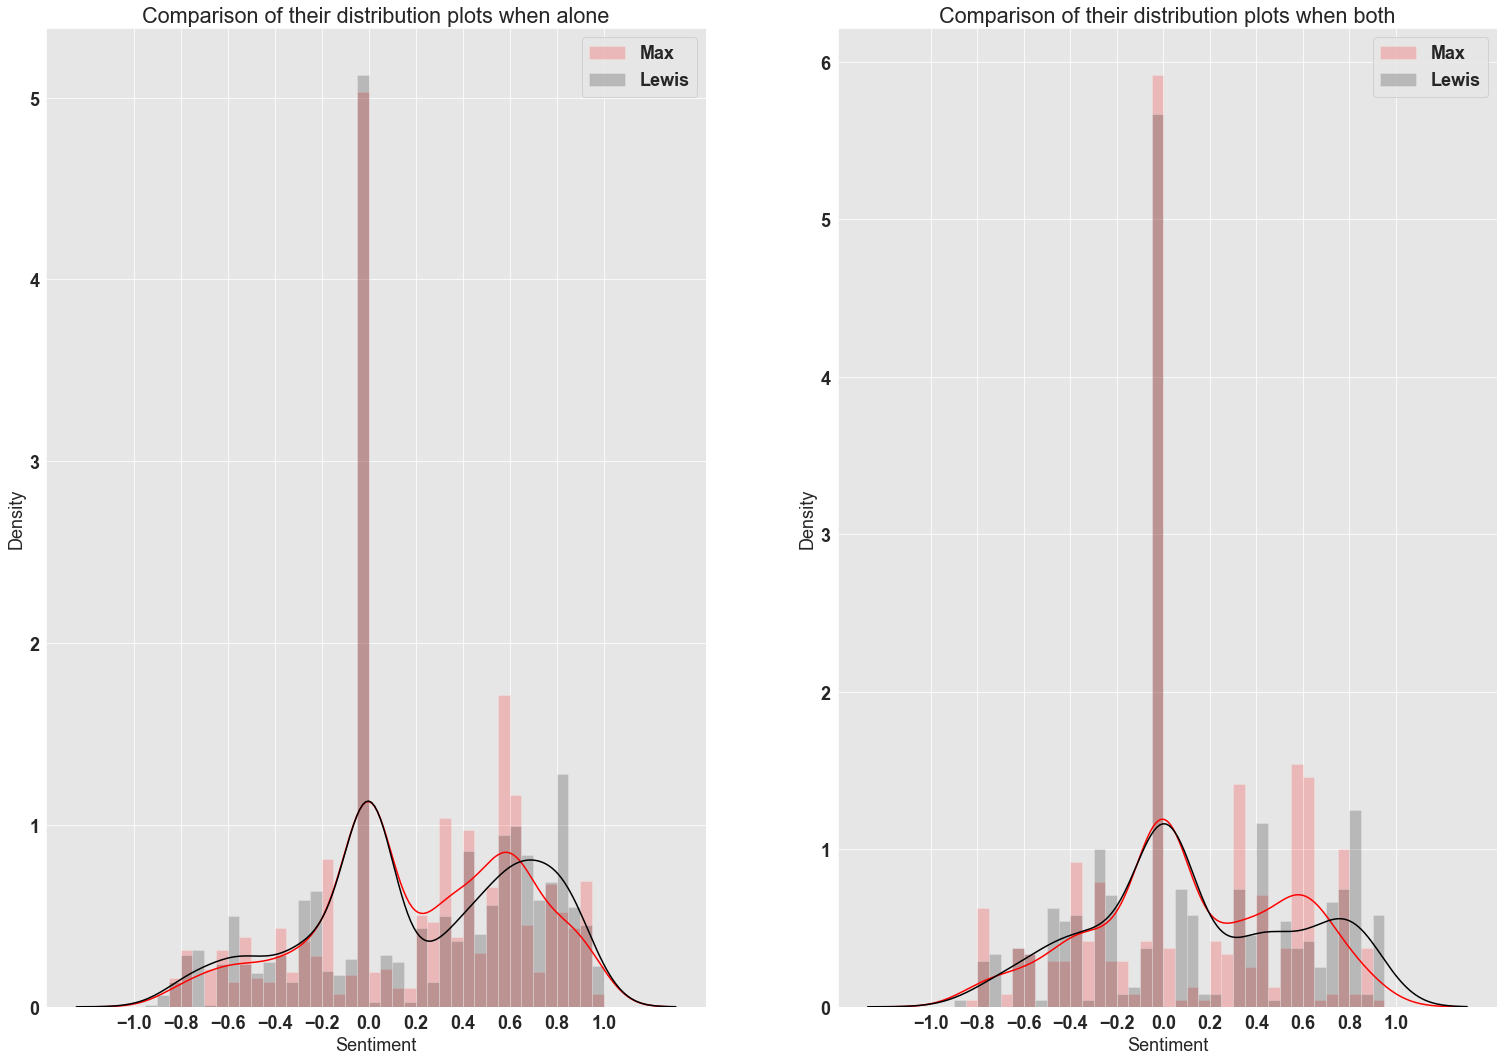

In [135]:
max_value1 = np.mean(Max_df['Max_sent'])
print(f'Max mean: {max_value1}')
lewis_value1 = np.mean(Lewis_df['Lewis_sent'])
print(f'Lewis mean: {lewis_value1}')

plt.subplot(1, 2, 1)
sns.distplot(Max_df['Max_sent'], hist_kws = dict(alpha = 0.2), color = 'red', label = 'Max',bins = np.arange(-1,1.1,0.05))
sns.distplot(Lewis_df['Lewis_sent'], hist_kws = dict(alpha = 0.2), color = 'black', label = 'Lewis',bins = np.arange(-1,1.1,0.05))
plt.legend()
plt.xlabel('Sentiment')
plt.xticks(np.arange(-1,1.1,0.2))
plt.title('Comparison of their distribution plots when alone')

plt.subplot(1,2,2)
df_both = df_all[(df_all['Max_sent'] != 'Nan') & (df_all['Lewis_sent'] != 'Nan')]
max_value2 = np.mean(df_both['Max_sent'])
print(f'Max mean when both: {max_value2}')
lewis_value2 = np.mean(df_both['Lewis_sent'])
print(f'Lewis mean when both: {lewis_value2}')
sns.distplot(df_both['Max_sent'], hist_kws = dict(alpha = 0.2), color = 'red', label = 'Max', bins = np.arange(-1,1.1,0.05))
sns.distplot(df_both['Lewis_sent'], hist_kws = dict(alpha = 0.2), color = 'black', label = 'Lewis', bins = np.arange(-1,1.1,0.05))
plt.legend()
plt.xticks(np.arange(-1,1.1,0.2))
plt.xlabel('Sentiment')
plt.title('Comparison of their distribution plots when both')

plt.savefig('distr_sent_tweet.pdf')

In [108]:
number_pos_max_alone = len(Max_df['Max_sent'][Max_df['Max_sent'] >= 0.05])
number_neg_max_alone = len(Max_df['Max_sent'][Max_df['Max_sent'] <= -0.05])
number_neu_max_alone = len(Max_df['Max_sent'][(Max_df['Max_sent'] < 0.05) & (Max_df['Max_sent'] > -0.05)])

number_pos_lewis_alone = len(Lewis_df['Lewis_sent'][Lewis_df['Lewis_sent'] >= 0.05])
number_neg_lewis_alone = len(Lewis_df['Lewis_sent'][Lewis_df['Lewis_sent'] <= -0.05])
number_neu_lewis_alone = len(Lewis_df['Lewis_sent'][(Lewis_df['Lewis_sent'] < 0.05) & (Lewis_df['Lewis_sent'] > -0.05)])

number_pos_max_both = len(df_both['Max_sent'][df_both['Max_sent'] >= 0.05])
number_neg_max_both = len(df_both['Max_sent'][df_both['Max_sent'] <= -0.05])
number_neu_max_both = len(df_both['Max_sent'][(df_both['Max_sent'] < 0.05) & (df_both['Max_sent'] > -0.05)])

number_pos_lewis_both = len(df_both['Lewis_sent'][df_both['Lewis_sent'] >= 0.05])
number_neg_lewis_both = len(df_both['Lewis_sent'][df_both['Lewis_sent'] <= -0.05])
number_neu_lewis_both = len(df_both['Lewis_sent'][(df_both['Lewis_sent'] < 0.05) & (df_both['Lewis_sent'] > -0.05)])

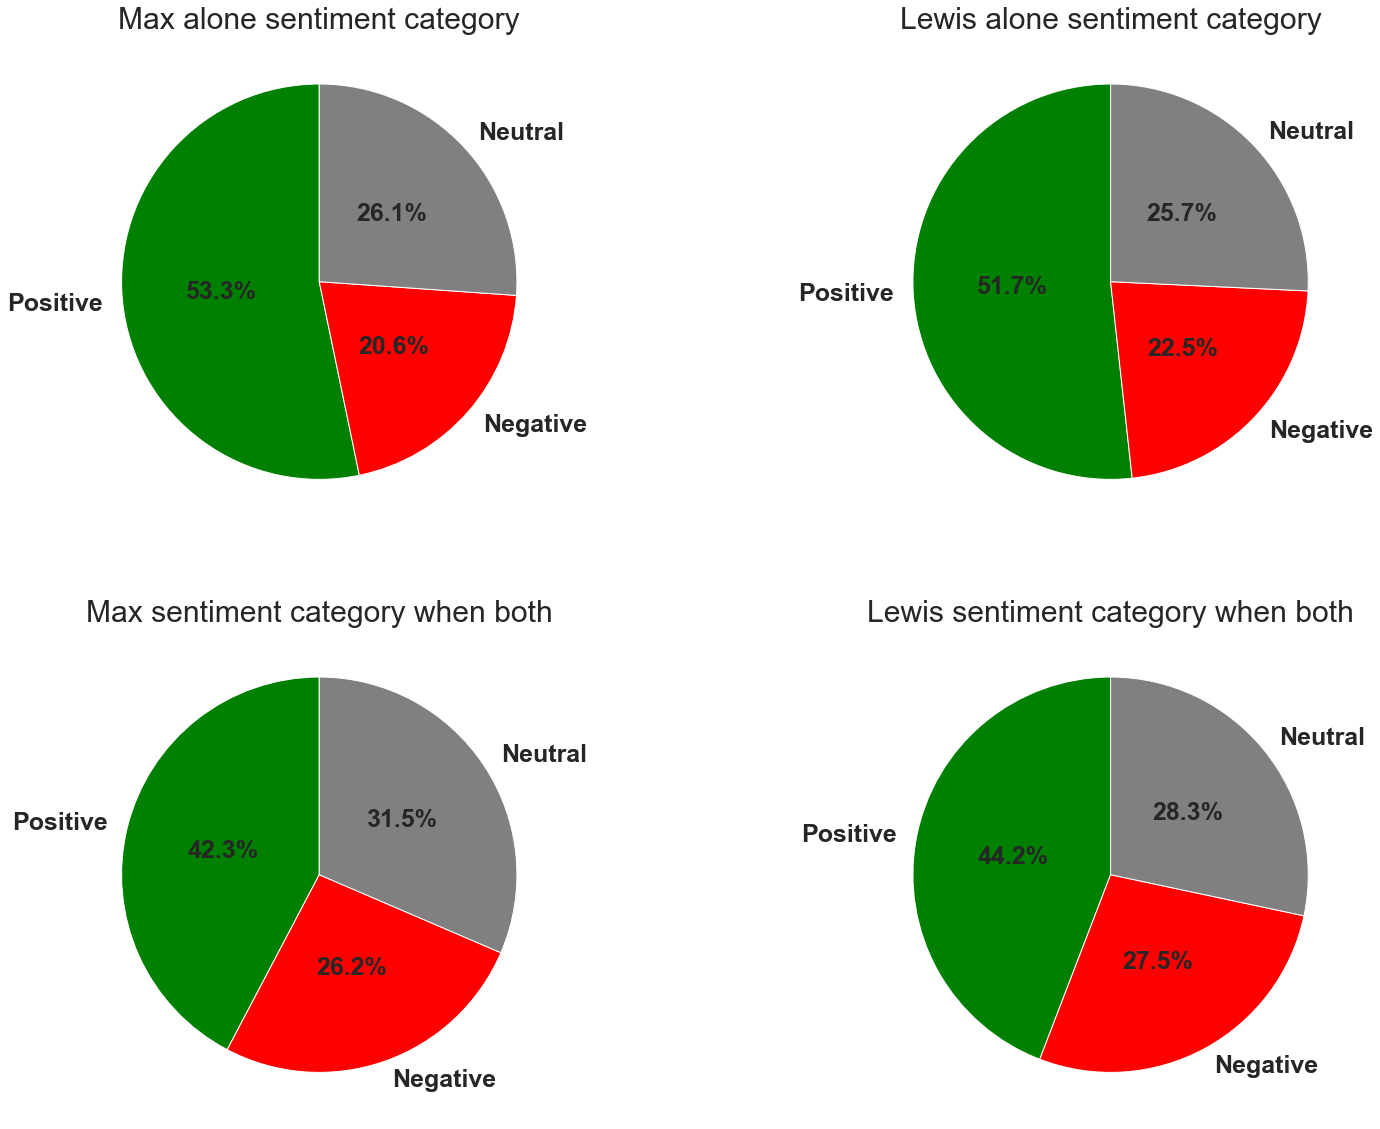

In [136]:
plt.rcParams['figure.figsize'] = [26, 20]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


fig = plt.figure()
gs = GridSpec(nrows=2, ncols=2)

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_max_alone ,number_neg_max_alone, number_neu_max_alone]
ax = fig.add_subplot(gs[0, 0])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Max alone sentiment category")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_lewis_alone ,number_neg_lewis_alone, number_neu_lewis_alone]
ax = fig.add_subplot(gs[0, 1])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Lewis alone sentiment category")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_max_both ,number_neg_max_both, number_neu_max_both]
ax = fig.add_subplot(gs[1, 0])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Max sentiment category when both")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_lewis_both,number_neg_lewis_both, number_neu_lewis_both]
ax = fig.add_subplot(gs[1, 1])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Lewis sentiment category when both")

plt.savefig('percent_sent_tweet.pdf')

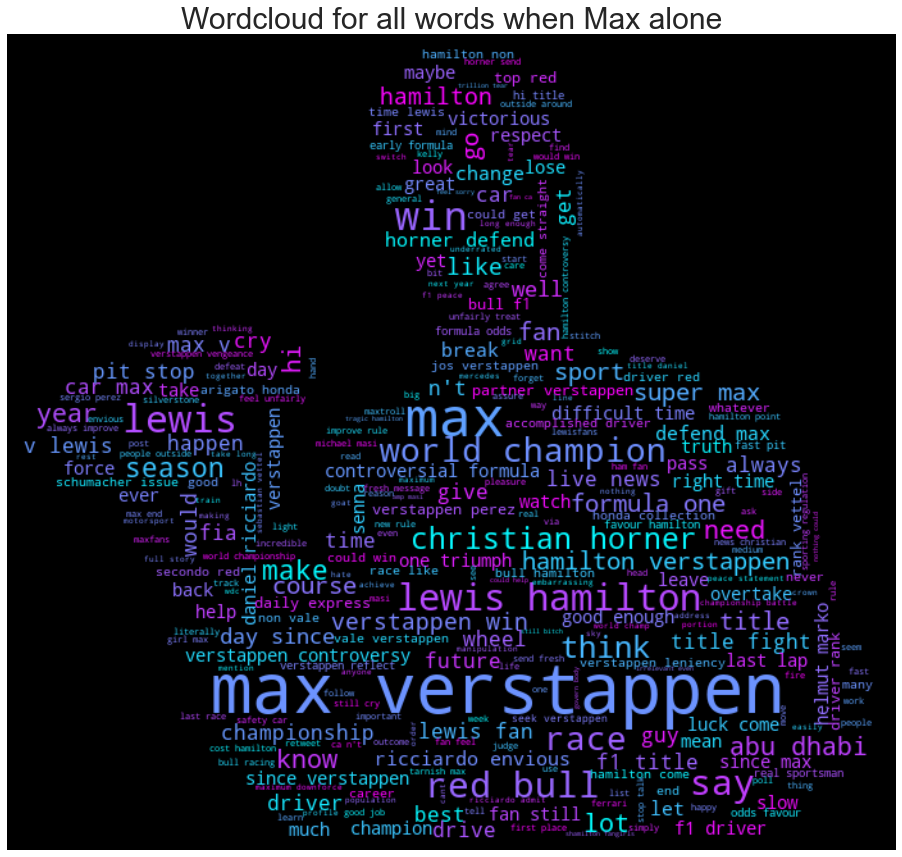

In [149]:
whole_t = ' '.join(Max_df['lemmed sentence'])
medalion = np.array(Image.open("max.png"))



punct= string.punctuation
stop = stopwords.words('english')

for p in punct:
    stop.append(p)

wc = WordCloud(background_color="black", stopwords = stop, max_words=300, mask=medalion, contour_width=0, contour_color='black', margin=0,colormap='cool')

# Generate a wordcloud
wc.generate(whole_t)
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for all words when Max alone')
plt.savefig('max_wc.pdf')

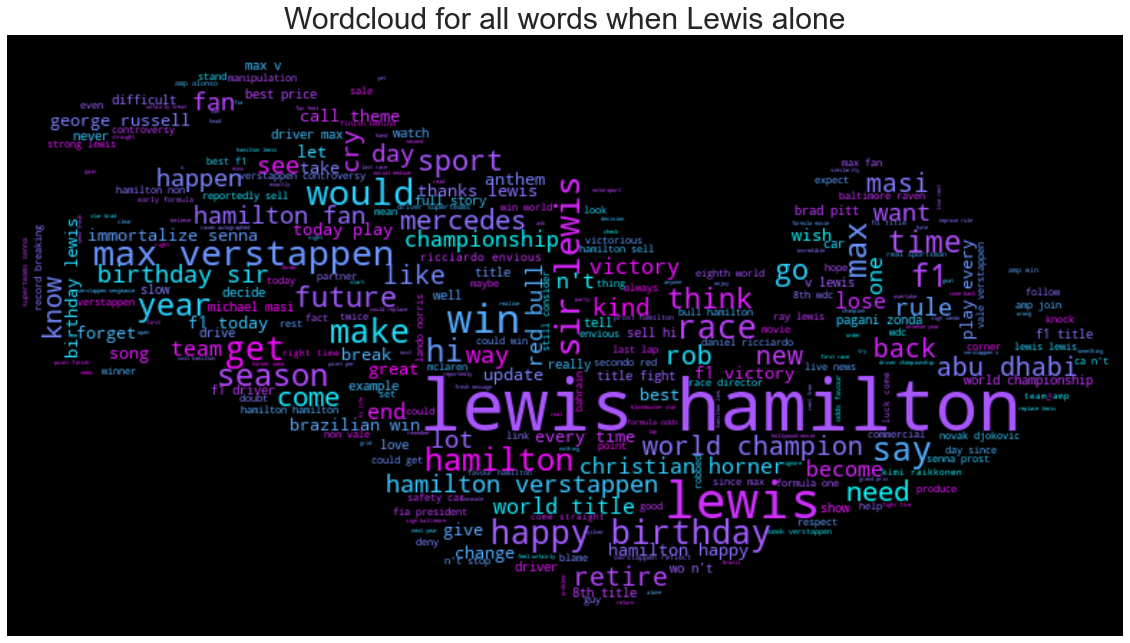

In [148]:
whole_t = ' '.join(Lewis_df['lemmed sentence'])
medalion = np.array(Image.open("lewis.png"))



punct= string.punctuation
stop = stopwords.words('english')

for p in punct:
    stop.append(p)

wc = WordCloud(background_color="black", stopwords = stop, max_words=300, mask=medalion, contour_width=0, contour_color='black', margin=0,colormap='cool')

# Generate a wordcloud
wc.generate(whole_t)
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for all words when Lewis alone')
plt.savefig('lewis_wc.pdf')


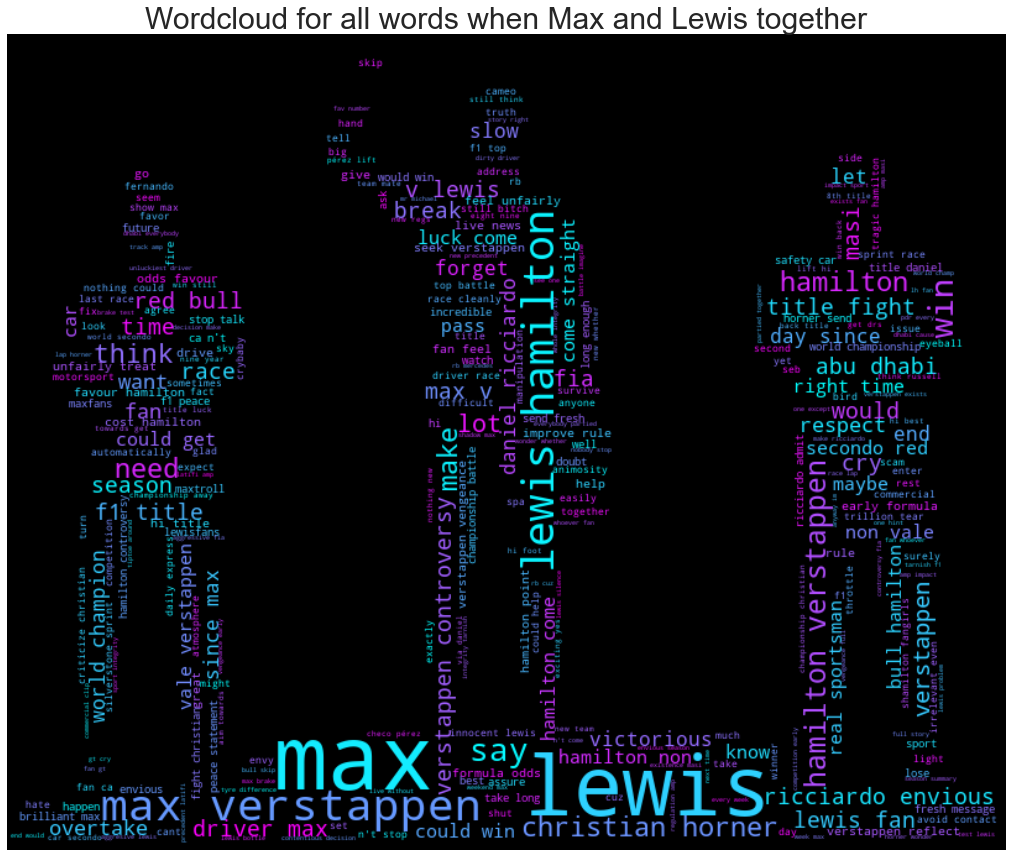

In [139]:
whole_t = ' '.join(df_both['lemmed sentence'])
medalion = np.array(Image.open("both.png"))



punct= string.punctuation
stop = stopwords.words('english')

for p in punct:
    stop.append(p)

wc = WordCloud(background_color="black", stopwords = stop, max_words=300, mask=medalion, contour_width=0, contour_color='black', margin=0,colormap='cool')

# Generate a wordcloud
wc.generate(whole_t)
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for all words when Max and Lewis together')
plt.savefig('l_m_wc.pdf')

In [141]:
df_m_l = df_all[((df_all['Max_sent'] != "Nan") | (df_all["Lewis_sent"] != "Nan"))]
df_m_l = df_m_l[df_m_l['category'] == 'neg']

In [142]:
whole_neg_words = []
l = ['lewis', 'hamilton','max','verstappen','amp', '...', '’',"'s","n't","hi","2021",'-max','``','✓']
stop.extend(l)
for l in df_m_l['lemmed tokens']:
    for t in l:
        if t not in stop:
            whole_neg_words.append(t)

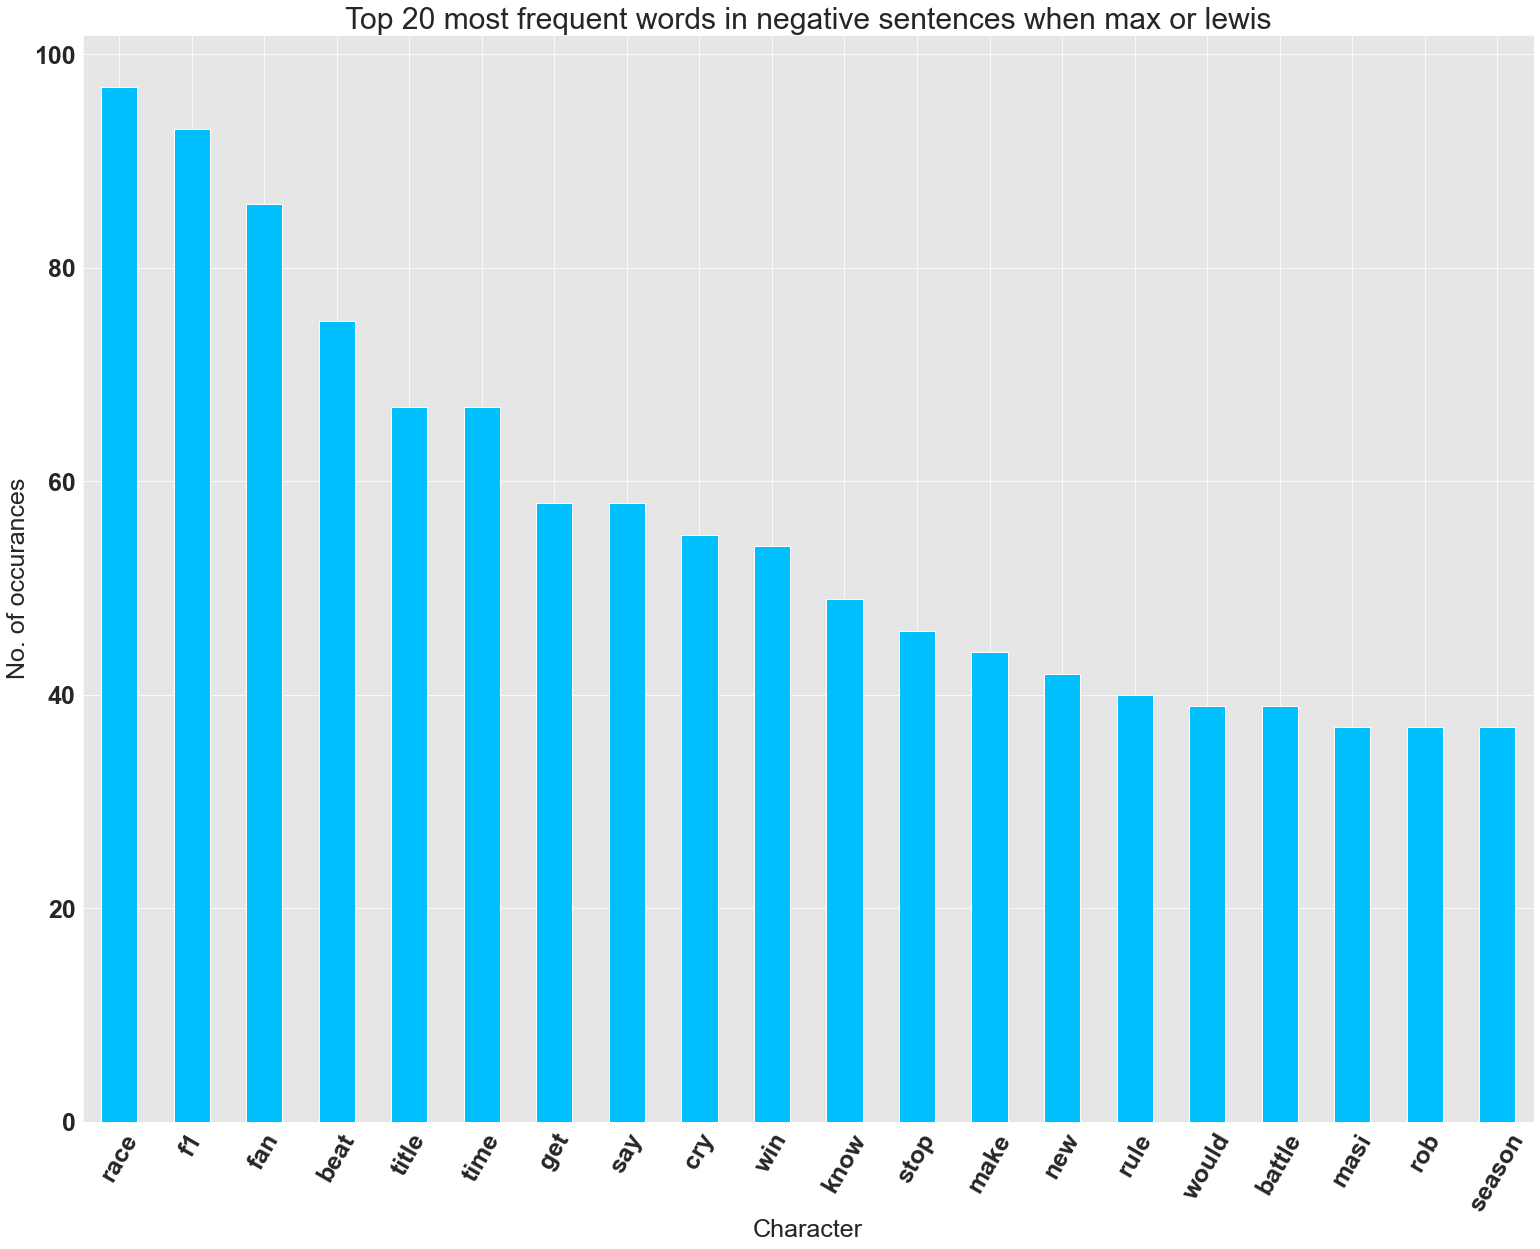

In [143]:
def summarize_text(nouns, top_num):
    counts = dict(Counter(nouns).most_common(top_num))
    return counts

neg_w = summarize_text(whole_neg_words, 20)

words = list(neg_w.keys())
values = list(neg_w.values())
df_20 = pd.DataFrame({'neg_words': words, 'values': values})
df_20.plot.bar(y = 'values', x = 'neg_words', color = 'deepskyblue', rot =60,legend=False)
plt.title('Top 20 most frequent words in negative sentences when max or lewis')
plt.xlabel("Character")
plt.ylabel("No. of occurances")
plt.savefig('negative_words_tweet.pdf')

In [74]:
import spacy
import en_core_web_sm
import geonamescache as gc
from geopy.geocoders import Nominatim
from geotext import GeoText
from spacy.tokens import Span
import geopy.distance
import nltk
import geopandas as gpd
from geopy.geocoders import Nominatim
gca = gc.GeonamesCache()

In [73]:
all_loc = []
for loc in df_all['location']:
    split_l = str(loc).split(',')
    all_loc.append(split_l)
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe', 'USA', 'UK']

In [78]:
geolocator = Nominatim(user_agent = 'project')
dict_coord = {}
l_r = []
for i,place in enumerate(all_loc):
    if i % 100 == 0:
        print(i)
    l1 = 'Nan'
    for p in place:
        try:
            if gca.search_cities(p) != [] or p in countries:
                location = geolocator.geocode(p)
                l1 = (location.latitude, location.longitude)
                break
        except:
            pass
    l_r.append(l1)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [80]:
df_all['coords'] = l_r

In [144]:
df_all2 = pd.read_csv (r'final_csv.csv')

In [145]:
counts = df_all2['coords'].value_counts()

In [146]:
names= counts.index.tolist()[1:]
values = list(counts[1:])

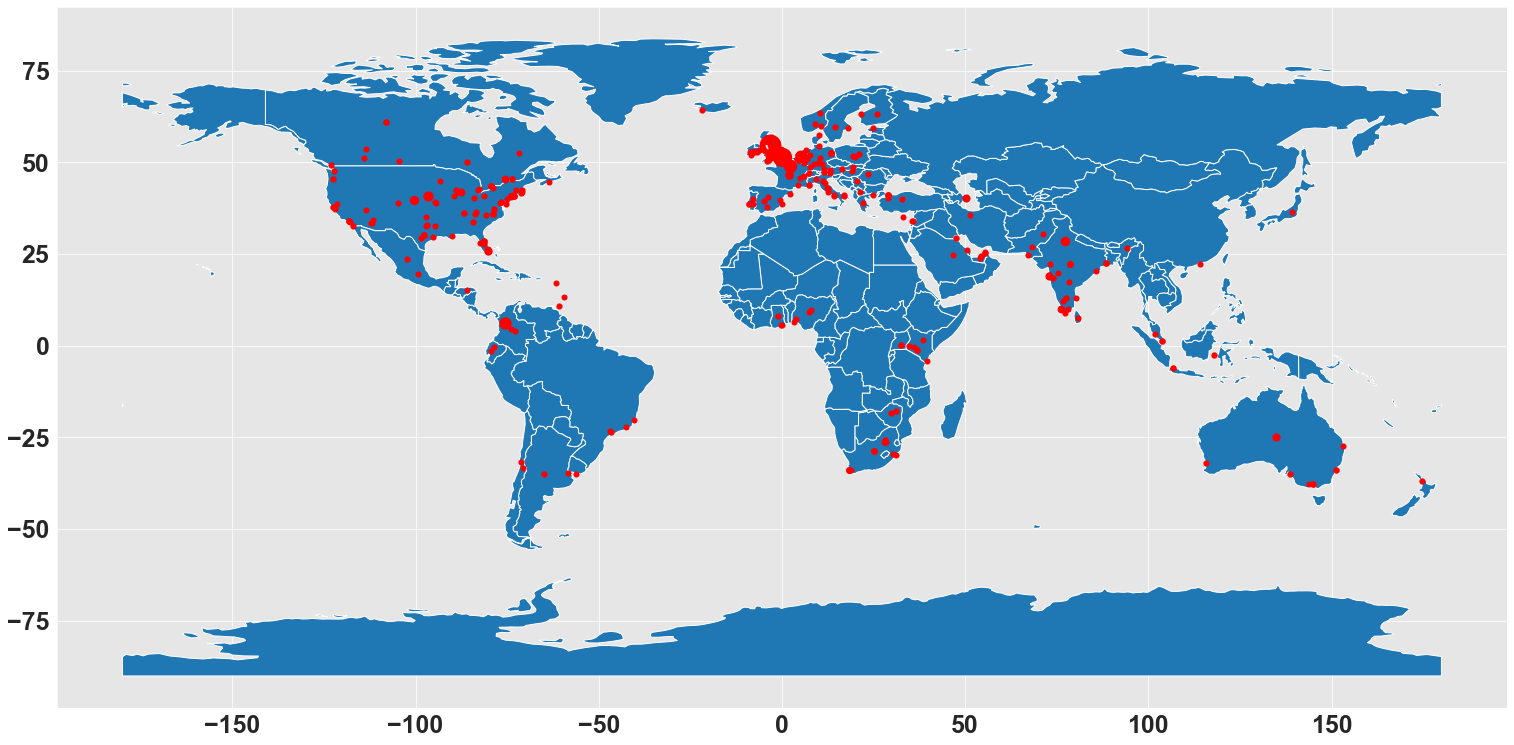

In [147]:
fig, ax = plt.subplots(figsize=(26,20))
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world.plot(ax = ax)
for i in range(len(names)):
    plt.scatter(eval(names[i])[1], eval(names[i])[0], color = 'red', lw = values[i]/50)
plt.savefig("tweets.pdf")

In [52]:
df_map = df_all2[df_all2['coords'] != 'Nan']
lat = []
long = []
for i in df_map['coords']:
    lat.append(eval(i)[0])
    long.append(eval(i)[1])
    


In [153]:
df_map['mention'][19503] == "['Max', 'Lewis']"

True

In [157]:
import folium
data = pd.DataFrame({'lat': lat,'lon': long,'sentiment': df_map['sentiment score'],'mention': df_map['mention'], 'Max_sent': df_map['Max_sent'], 'Lewis_sent': df_map['Lewis_sent']})
m = folium.Map(location=[20, 0], zoom_start=2)
for j in range(0, len(data)):
    try:
        if data.iloc[j]['mention'] != '[]':
            if data.iloc[j]['mention'] == "['Max', 'Lewis']":
                if data.iloc[j]['sentiment'] >= 0.05:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMax :" + str
                    (data.iloc[j]['Max_sent']) + " \nLewis :" + str(data.iloc[j]['Lewis_sent']),
                    icon=folium.Icon(color='green')).add_to(m)
                elif data.iloc[j]['sentiment'] <= -0.05:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMax :" + str
                    (data.iloc[j]['Max_sent']) + " \nLewis :" + str(data.iloc[j]['Lewis_sent']),
                    icon=folium.Icon(color='red')).add_to(m)
                else:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMax :" + str
                    (data.iloc[j]['Max_sent']) + " \nLewis :" + str(data.iloc[j]['Lewis_sent']),
                    icon=folium.Icon(color='blue')).add_to(m)
            else:
                if data.iloc[j]['sentiment'] >= 0.05:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMention :" + str
                    (data.iloc[j]['mention']),
                    icon=folium.Icon(color='green')).add_to(m)
                elif data.iloc[j]['sentiment'] <= -0.05:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMention :" + str
                    (data.iloc[j]['mention']),
                    icon=folium.Icon(color='red')).add_to(m)
                else:
                    folium.Marker([data.iloc[j]['lat'], data.iloc[j]['lon']],
                    popup="Sentiment :  " + str(round(data.iloc[j]['sentiment'], 3)) + " \nMention :" + str
                    (data.iloc[j]['mention']),
                    icon=folium.Icon(color='blue')).add_to(m)
    except:
        # print("error"+str(j))
        pass
m.save("AOUD_geo.html")

In [3]:
df_yt_comments = pd.read_csv(r'formula1_yt_comments.csv')

In [5]:
df_yt_comments['date'] = pd.to_datetime(df_yt_comments['date'])

In [13]:
start_date = '2021-12-12'
end_date = '2021-12-15'
mask = (df_yt_comments['date'] > start_date) & (df_yt_comments['date'] <= end_date)

df_yt = df_yt_comments.loc[mask]

In [14]:
df_yt

,comments,date
936,WoW,2021-12-14 23:53:32+00:00
937,To watch over and over ..... this was fantastic,2021-12-14 23:46:33+00:00
938,Crofty has been loud before but never this loud,2021-12-14 23:45:02+00:00
939,I keep coming back to rewatch it,2021-12-14 23:20:15+00:00
940,"Logically, It should have been red flagged on ...",2021-12-14 23:11:47+00:00
...,...,...
9368,Nice,2021-12-12 15:51:10+00:00
9369,First viewer,2021-12-12 15:51:08+00:00
9370,HISTORY!,2021-12-12 15:51:08+00:00
9371,What a final lap.,2021-12-12 15:51:04+00:00


In [17]:
lemmed_sentences_yt = []
connected_lemmed_yt = []
count_yt = 0

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for sentence in df_yt['comments']:
    if count_yt % 100 == 0:
        print(count_yt)
    text = re.sub(r'http\S+', '', sentence)
    clean_yt = re.sub("@[A-Za-z0-9_]+","", text)
    clean_yt = re.sub("#[A-Za-z0-9_]+","", clean_yt)
    clean_yt = deEmojify(clean_yt)
    lem = lemmatize_sentence(clean_yt)
    lem_c = ' '.join(lem)
    connected_lemmed_yt.append(lem_c)
    lemmed_sentences_yt.append(lem)
    count_yt += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400


In [67]:
sid_obj = SentimentIntensityAnalyzer()
sentiment_result_yt = []
sent_yt = []
for text in connected_lemmed_yt:
    sentiment_dict = sid_obj.polarity_scores(text)
    sent_yt.append(sentiment_dict['compound'])
    if sentiment_dict['compound'] >= 0.05 :
        sentiment_result_yt.append('pos')
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment_result_yt.append('neg')
    else :
        sentiment_result_yt.append('neu')

data = {'original sentence':df_yt['comments'],'category':sentiment_result_yt, 'sentiment score': sent_yt, 'lemmed tokens':lemmed_sentences_yt, 'lemmed sentence':connected_lemmed_yt}
df_all_yt = pd.DataFrame(data)

In [68]:
mention_whole = []
for lem_c in df_all_yt['lemmed sentence']:
    mention = []
    if 'max' in lem_c or 'verstappen' in lem_c:
        mention.append('Max')
    if 'lewis' in lem_c or 'hamilton' in lem_c:
        mention.append('Lewis')
    mention_whole.append(mention)
    
df_all_yt['mention'] = mention_whole

In [73]:
df_all_yt = df_all_yt.reset_index(drop = True)
number_max = 0
number_lewis = 0
max_text = []
lewis_text = []
for i,mention in enumerate(df_all_yt['mention']):
    m_t = []
    l_t = []
    if mention == ['Max', 'Lewis']:
        sentence = df_all_yt.at[i, 'lemmed sentence']
        if 'max' in sentence:
            a = sentence.split('max')
            a[0] += 'max'
            a[1] = 'max' + a[1]
            for t in a:
                if 'lewis' in t or 'hamilton' in t:
                    part_lewis = t
        elif 'verstappen' in sentence:
            a = sentence.split('verstappen')
            a[0] += 'verstappen'
            a[1] = 'verstappen' + a[1]
            for t in a:
                if 'lewis' in t or 'hamilton' in t:
                    part_lewis = t
        if 'lewis' in sentence:
            a = sentence.split('lewis')
            a[0] += 'lewis'
            a[1] = 'lewis' + a[1]
            for t in a:
                if 'max' in t or 'verstappen' in t:
                    part_max = t 
        elif 'hamilton' in sentence:
            a = sentence.split('hamilton')
            a[0] += 'hamilton'
            a[1] = 'hamilton' + a[1]
            for t in a:
                if 'max' in t or 'verstappen' in t:
                    part_max = t
        m_t.append(part_max)
        l_t.append(part_lewis)
    max_text.append(m_t)
    lewis_text.append(l_t)
    
df_all_yt['Max_part'] = max_text
df_all_yt['Lewis_part'] = lewis_text

In [78]:
count_m = 0
count_l = 0
count_m_l = 0
for i in df_all_yt['mention']:
    if i == ['Max']:
        count_m += 1
    if i == ['Lewis']:
        count_l += 1
    if i == ['Max', 'Lewis']:
        count_m_l += 1

In [79]:
print(count_m)
print(count_l)
print(count_m_l)

1678
691
863


In [80]:
max_sent = []
lewis_sent = []
for i,mention in enumerate(df_all_yt['mention']):
    if mention == ['Max', 'Lewis']:
        sentiment_dict_max = sid_obj.polarity_scores(df_all_yt.at[i,'Max_part'][0])
        max_sent.append(sentiment_dict_max['compound'])
        sentiment_dict_lewis = sid_obj.polarity_scores(df_all_yt.at[i,'Lewis_part'][0])
        lewis_sent.append(sentiment_dict_lewis['compound'])
    elif mention == ['Max']:
        max_sent.append(df_all_yt.at[i,'sentiment score'])
        lewis_sent.append('Nan')
    elif mention == ['Lewis']:
        lewis_sent.append(df_all_yt.at[i,'sentiment score'])
        max_sent.append('Nan')
    else:
        lewis_sent.append('Nan')
        max_sent.append('Nan')
df_all_yt['Max_sent'] = max_sent
df_all_yt['Lewis_sent'] = lewis_sent

In [85]:
Max_df = df_all_yt[df_all_yt['Max_sent'] != 'Nan']
Lewis_df = df_all_yt[df_all_yt['Lewis_sent'] != 'Nan']
df_both = df_all_yt[(df_all_yt['Max_sent'] != 'Nan') & (df_all_yt['Lewis_sent'] != 'Nan')]

In [86]:
number_pos_max_alone = len(Max_df['Max_sent'][Max_df['Max_sent'] >= 0.05])
number_neg_max_alone = len(Max_df['Max_sent'][Max_df['Max_sent'] <= -0.05])
number_neu_max_alone = len(Max_df['Max_sent'][(Max_df['Max_sent'] < 0.05) & (Max_df['Max_sent'] > -0.05)])

number_pos_lewis_alone = len(Lewis_df['Lewis_sent'][Lewis_df['Lewis_sent'] >= 0.05])
number_neg_lewis_alone = len(Lewis_df['Lewis_sent'][Lewis_df['Lewis_sent'] <= -0.05])
number_neu_lewis_alone = len(Lewis_df['Lewis_sent'][(Lewis_df['Lewis_sent'] < 0.05) & (Lewis_df['Lewis_sent'] > -0.05)])

number_pos_max_both = len(df_both['Max_sent'][df_both['Max_sent'] >= 0.05])
number_neg_max_both = len(df_both['Max_sent'][df_both['Max_sent'] <= -0.05])
number_neu_max_both = len(df_both['Max_sent'][(df_both['Max_sent'] < 0.05) & (df_both['Max_sent'] > -0.05)])

number_pos_lewis_both = len(df_both['Lewis_sent'][df_both['Lewis_sent'] >= 0.05])
number_neg_lewis_both = len(df_both['Lewis_sent'][df_both['Lewis_sent'] <= -0.05])
number_neu_lewis_both = len(df_both['Lewis_sent'][(df_both['Lewis_sent'] < 0.05) & (df_both['Lewis_sent'] > -0.05)])

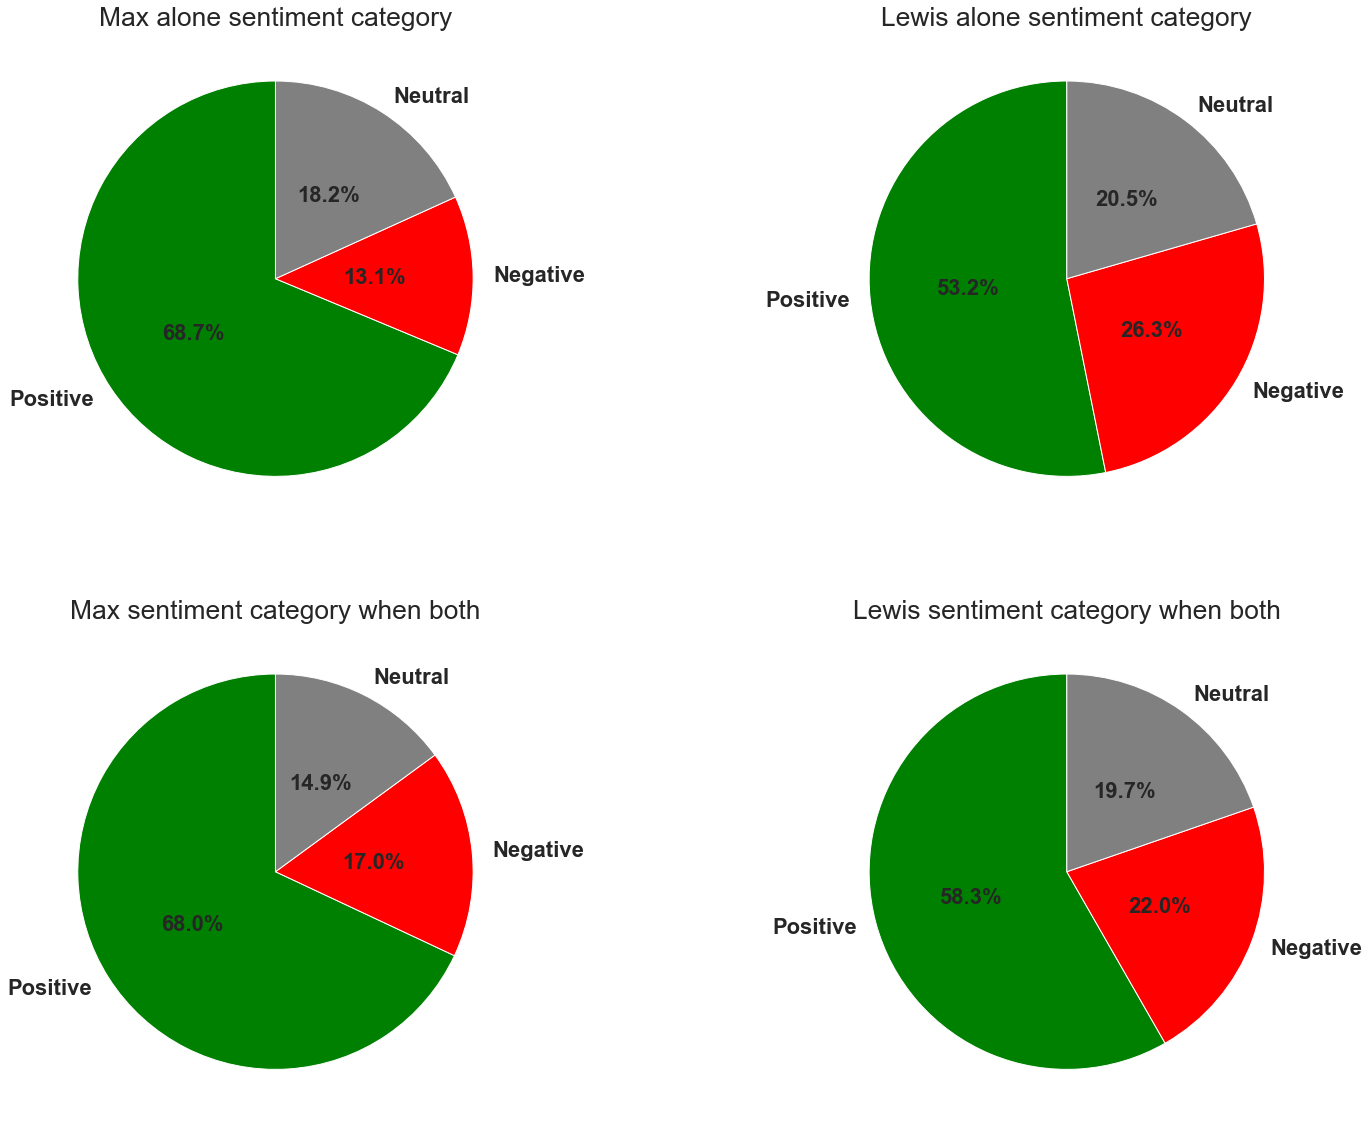

In [88]:
fig = plt.figure()
gs = GridSpec(nrows=2, ncols=2)

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_max_alone ,number_neg_max_alone, number_neu_max_alone]
ax = fig.add_subplot(gs[0, 0])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Max alone sentiment category")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_lewis_alone ,number_neg_lewis_alone, number_neu_lewis_alone]
ax = fig.add_subplot(gs[0, 1])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Lewis alone sentiment category")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_max_both ,number_neg_max_both, number_neu_max_both]
ax = fig.add_subplot(gs[1, 0])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Max sentiment category when both")

colors = ['green', 'red', 'grey']
names = ['Positive' , 'Negative', 'Neutral']
values = [number_pos_lewis_both,number_neg_lewis_both, number_neu_lewis_both]
ax = fig.add_subplot(gs[1, 1])
ax.pie(values, colors = colors, labels=names, autopct='%1.1f%%', startangle=90, pctdistance=0.5)
ax.set_title("Lewis sentiment category when both")

plt.savefig('YT_sentiment.pdf')